In [ ]:
'''Required libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
import itertools
from script.utility import preprocess_project_data, stock_selection
from script.BaseStrategy import BaseStrategy, BenchmarkStrategy

# 1.Data Loading & Preprocessing

In [2]:
train_df, test_df = preprocess_project_data("data/Trading_Project_Data_Cleaned.csv")

Loaded (249, 140) rows.
Tickers: ['AAPL', 'AMZN', 'BA', 'CAT', 'CVX', 'GOOGL', 'GS', 'JNJ', 'JPM', 'KO', 'MCD', 'MSFT', 'NKE', 'NVDA', 'PFE', 'SOFI', 'TSLA', 'UNH', 'WMT', 'XOM']
  added indicators for AAPL
  added indicators for AMZN
  added indicators for BA
  added indicators for CAT
  added indicators for CVX
  added indicators for GOOGL
  added indicators for GS
  added indicators for JNJ
  added indicators for JPM
  added indicators for KO
  added indicators for MCD
  added indicators for MSFT
  added indicators for NKE
  added indicators for NVDA
  added indicators for PFE
  added indicators for SOFI
  added indicators for TSLA
  added indicators for UNH
  added indicators for WMT
  added indicators for XOM
Train rows: 28, Test rows: 221


# Dataset INFO

In [6]:
train_df.head()

,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Adj_Return_AAPL,SMA_short_AAPL,SMA_long_AAPL,Volatility_AAPL,RSI_AAPL,EMA_AAPL,...,Adj_Return_XOM,SMA_short_XOM,SMA_long_XOM,Volatility_XOM,RSI_XOM,EMA_XOM,BOLL_upper_XOM,BOLL_lower_XOM,MACD_line_XOM,MACD_signal_XOM
Price_Ticker,,,,,,,,,,,,,,,,,,,,,
2024-01-22,194.377730,191.322690,192.944748,60133900.0,NaN,192.944748,192.944748,NaN,NaN,192.944748,...,NaN,93.626274,93.626274,NaN,NaN,93.626274,NaN,NaN,0.000000,0.000000
2024-01-23,194.795683,192.885045,194.228455,42355600.0,0.006631,193.586601,193.586601,NaN,NaN,193.265675,...,0.011195,94.153301,94.153301,NaN,NaN,93.889788,95.643959,92.662643,0.084084,0.016817
2024-01-24,195.422613,193.392550,193.551773,53631300.0,-0.003490,193.574992,193.574992,0.007157,65.482270,193.337199,...,0.017113,94.873726,94.873726,0.004185,NaN,94.495985,97.582816,92.164636,0.279371,0.069328
2024-01-25,195.313157,192.168559,193.223389,54822100.0,-0.001698,193.487091,193.487091,0.005401,56.087123,193.308747,...,0.025084,95.845573,95.845573,0.006970,NaN,95.562267,100.318222,91.372925,0.624355,0.180333
2024-01-26,193.810507,191.004263,191.481918,44594000.0,-0.009054,193.086057,193.086057,0.006494,31.851844,192.852040,...,0.008483,96.596944,96.596944,0.007354,NaN,96.572307,101.724768,91.469119,0.954640,0.335195


In [7]:
test_df.head()

,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Adj_Return_AAPL,SMA_short_AAPL,SMA_long_AAPL,Volatility_AAPL,RSI_AAPL,EMA_AAPL,...,Adj_Return_XOM,SMA_short_XOM,SMA_long_XOM,Volatility_XOM,RSI_XOM,EMA_XOM,BOLL_upper_XOM,BOLL_lower_XOM,MACD_line_XOM,MACD_signal_XOM
Price_Ticker,,,,,,,,,,,,,,,,,,,,,
2024-03-01,179.879127,176.740489,179.012268,73488000.0,-0.006049,181.568849,184.506746,0.006439,30.703080,180.806017,...,0.012550,101.460169,100.353412,0.005388,72.681418,102.018202,103.288993,100.711920,1.473991,1.436509
2024-03-04,176.262218,173.163430,174.468719,81510100.0,-0.025709,180.817403,183.826218,0.012137,24.304457,179.221693,...,-0.014082,101.746464,100.443534,0.009637,66.146848,101.977515,103.217351,100.672018,1.396503,1.428508
2024-03-05,171.419729,169.008455,169.506653,95132400.0,-0.028853,179.676530,182.974672,0.012051,19.192864,176.792933,...,0.012191,101.901811,100.578598,0.010824,60.279914,102.259320,103.604727,100.786587,1.419537,1.426714
2024-03-06,170.622621,168.071838,168.510254,68587700.0,-0.005896,178.581327,182.230151,0.012173,19.678216,174.722263,...,0.010640,102.149064,100.691247,0.011330,64.587356,102.746393,104.540621,100.553413,1.509385,1.443248
2024-03-07,170.114444,167.882530,168.390686,71765100.0,-0.000710,177.538433,181.625738,0.012862,20.265195,173.139369,...,0.005604,102.524825,100.906228,0.011228,73.008024,103.258098,105.387791,100.637626,1.609292,1.476457


In [8]:
full_df = pd.concat([train_df, test_df]).sort_index()

# 2. Stock Selection

In [6]:
selected = stock_selection(train_df)

Ranking by Volatility (higher is better):
SOFI: Volatility = 0.05138, Vol_Rank = 1.0
NVDA: Volatility = 0.03588, Vol_Rank = 2.0
TSLA: Volatility = 0.03439, Vol_Rank = 3.0
GOOGL: Volatility = 0.02121, Vol_Rank = 4.0
AMZN: Volatility = 0.02028, Vol_Rank = 5.0
BA: Volatility = 0.01947, Vol_Rank = 6.0
CAT: Volatility = 0.01456, Vol_Rank = 7.0
NKE: Volatility = 0.01400, Vol_Rank = 8.0
CVX: Volatility = 0.01387, Vol_Rank = 9.0
UNH: Volatility = 0.01347, Vol_Rank = 10.0
MSFT: Volatility = 0.01262, Vol_Rank = 11.0
GS: Volatility = 0.01230, Vol_Rank = 12.0
XOM: Volatility = 0.01226, Vol_Rank = 13.0
PFE: Volatility = 0.01208, Vol_Rank = 14.0
MCD: Volatility = 0.01120, Vol_Rank = 15.0
WMT: Volatility = 0.01039, Vol_Rank = 16.0
AAPL: Volatility = 0.00861, Vol_Rank = 17.0
KO: Volatility = 0.00855, Vol_Rank = 18.0
JPM: Volatility = 0.00805, Vol_Rank = 19.0
JNJ: Volatility = 0.00769, Vol_Rank = 20.0

Ranking by Average Correlation (lower is better):
BA: Avg Corr = -0.05220, Corr_Rank = 1.0
UNH: Avg C

In [7]:
print("Top 10 Selected Tickers:")
print(selected)

Top 10 Selected Tickers:
['NVDA', 'SOFI', 'AMZN', 'XOM', 'TSLA', 'BA', 'CAT', 'WMT', 'CVX', 'UNH']


In [8]:
def keep_selected_tickers(df: pd.DataFrame, tickers: list[str]) -> pd.DataFrame:
    """
    Return a copy of `df` that keeps only the columns belonging to `tickers`.
    A column belongs to a ticker if its name ends with '_<TICKER>'.
    """
    keep_cols = [
        col for col in df.columns
        if any(col.endswith(f'_{tk}') for tk in tickers)
    ]
    return df[keep_cols].copy()

In [9]:
train_df = keep_selected_tickers(train_df, selected)
test_df  = keep_selected_tickers(test_df,  selected)

print("Filtered train_df shape:", train_df.shape)
print("Filtered test_df  shape:", test_df.shape)

Filtered train_df shape: (28, 140)
Filtered test_df  shape: (221, 140)


# 3. Strategies

In [39]:
# ---------------- Alpha1Strategy ------------------------------
class Alpha1Strategy(BaseStrategy):
    """
    Alpha#1 (WorldQuant):
        inner = Close
        inner[returns < 0] = rolling_std(returns, 20)
        raw   = ts_argmax(inner**2, 5)   # 0–4
        signal = 2 * rank(raw) - 1       # map cross‑sectional rank to [‑1,1]
    For single‑stock back‑test we simply normalise raw to [0,1] by /4.
    """

    def generate_signals(self, data):
        import numpy as np, pandas as pd

        close = data[f"Close_{self.ticker}"]
        ret   = close.pct_change().fillna(0)

        std20 = ret.rolling(20, min_periods=1).std()
        inner = close.copy()
        inner[ret < 0] = std20[ret < 0]

        # argmax of squared inner over last 5 days (0‑based index -> 0…4)
        def _argmax(x):
            return int(np.argmax(x[::-1]))   # position counting from most‑recent day

        argmax5 = (inner ** 2).rolling(5, min_periods=1).apply(_argmax, raw=True)

        # normalise 0…4 -> 0…1 then map to −1…1
        norm = argmax5 / 4.0
        signal = 2 * norm - 1
        return signal.fillna(0)

    def simulate(self, data):
        import numpy as np, pandas as pd

        signal = self.generate_signals(data)
        close  = data[f"Close_{self.ticker}"]
        div    = data.get(f"Dividends_{self.ticker}", close.mul(0))

        log_r  = ((close + div) / close.shift(1)).pipe(
            lambda s: s.apply(lambda x: 0 if x <= 0 else __import__('math').log(x))
        ).fillna(0)

        strat_r = signal.shift(1).fillna(0) * log_r

        self.results = pd.DataFrame({
            "Signal": signal,
            "LogReturn": log_r,
            "StrategyReturn": strat_r,
            "CumRet": strat_r.cumsum()
        })
        return self.results

# ---------------- Alpha10Strategy ------------------------------
class Alpha10Strategy(BaseStrategy):
    """
    Alpha #10  –  5‑day correlation between High and Volume,
    ts_rank over the last 5 days, mapped to [‑1,1].
    """

    def generate_signals(self, data):
        import pandas as pd, numpy as np

        h = data[f"High_{self.ticker}"]
        v = data[f"Volume_{self.ticker}"]

        corr5 = h.rolling(5, 1).corr(v)

        ts_rank5 = corr5.rolling(5, 1).apply(
            lambda x: pd.Series(x).rank(pct=True).iat[-1], raw=True
        )
        return 2 * ts_rank5 - 1   # map to [‑1,1]

    def simulate(self, data):
        import pandas as pd, numpy as np, math

        sig   = self.generate_signals(data)
        close = data[f"Close_{self.ticker}"]
        div   = data.get(f"Dividends_{self.ticker}", close.mul(0))

        log_r = ((close + div) / close.shift(1)).pipe(
            lambda s: s.apply(lambda x: 0 if x <= 0 else math.log(x))
        ).fillna(0)

        strat = sig.shift(1).fillna(0) * log_r

        self.results = pd.DataFrame({
            "Signal": sig,
            "LogReturn": log_r,
            "StrategyReturn": strat,
            "CumRet": strat.cumsum()
        })
        return self.results


# ---------------- Alpha25Strategy ------------------------------
class Alpha25Strategy(BaseStrategy):
    """
    Alpha #25 – fraction of negative‑return days over past 10 days,
    ts_rank mapped to [‑1,1].
    """

    def generate_signals(self, data):
        import pandas as pd, numpy as np

        close = data[f"Close_{self.ticker}"]
        r     = close.pct_change().fillna(0)
        neg   = (r < 0).astype(float).rolling(10, 1).mean()

        ts_rank10 = neg.rolling(10, 1).apply(
            lambda x: pd.Series(x).rank(pct=True).iat[-1], raw=True
        )
        return 2 * ts_rank10 - 1

    def simulate(self, data):
        import pandas as pd, numpy as np, math
        sig   = self.generate_signals(data)
        close = data[f"Close_{self.ticker}"]
        div   = data.get(f"Dividends_{self.ticker}", close.mul(0))

        log_r = ((close + div) / close.shift(1)).pipe(
            lambda s: s.apply(lambda x: 0 if x <= 0 else math.log(x))
        ).fillna(0)
        strat = sig.shift(1).fillna(0) * log_r
        self.results = pd.DataFrame({
            "Signal": sig,
            "LogReturn": log_r,
            "StrategyReturn": strat,
            "CumRet": strat.cumsum()
        })
        return self.results


# ---------------- Alpha83Strategy ------------------------------
class Alpha83Strategy(BaseStrategy):
    """
    Alpha #83 – (High - PrevClose) / (High - Low),
    ts_rank over 5 days, mapped to [‑1,1].
    """

    def generate_signals(self, data):
        import pandas as pd, numpy as np

        h  = data[f"High_{self.ticker}"]
        l  = data[f"Low_{self.ticker}"]
        pc = data[f"Close_{self.ticker}"].shift(1)

        raw = (h - pc) / (h - l).replace(0, np.nan)

        ts_rank5 = raw.rolling(5, 1).apply(
            lambda x: pd.Series(x).rank(pct=True).iat[-1], raw=True
        )
        return 2 * ts_rank5 - 1

    def simulate(self, data):
        import pandas as pd, numpy as np, math
        sig   = self.generate_signals(data)
        close = data[f"Close_{self.ticker}"]
        div   = data.get(f"Dividends_{self.ticker}", close.mul(0))

        log_r = ((close + div) / close.shift(1)).pipe(
            lambda s: s.apply(lambda x: 0 if x <= 0 else math.log(x))
        ).fillna(0)
        strat = sig.shift(1).fillna(0) * log_r
        self.results = pd.DataFrame({
            "Signal": sig,
            "LogReturn": log_r,
            "StrategyReturn": strat,
            "CumRet": strat.cumsum()
        })
        return self.results


# ---------------- Alpha90Strategy ------------------------------
class Alpha90Strategy(BaseStrategy):
    """
    Alpha #90 – z‑score of Volume vs 20‑day mean/std,
    ts_rank over 20 days, mapped to [‑1,1].
    """

    def generate_signals(self, data):
        import pandas as pd, numpy as np

        v      = data[f"Volume_{self.ticker}"]
        mean20 = v.rolling(20, 1).mean()
        std20  = v.rolling(20, 1).std().replace(0, np.nan)
        z      = (v - mean20) / std20

        ts_rank20 = z.rolling(20, 1).apply(
            lambda x: pd.Series(x).rank(pct=True).iat[-1], raw=True
        )
        return 2 * ts_rank20 - 1

    def simulate(self, data):
        import pandas as pd, numpy as np, math
        sig   = self.generate_signals(data)
        close = data[f"Close_{self.ticker}"]
        div   = data.get(f"Dividends_{self.ticker}", close.mul(0))

        log_r = ((close + div) / close.shift(1)).pipe(
            lambda s: s.apply(lambda x: 0 if x <= 0 else math.log(x))
        ).fillna(0)
        strat = sig.shift(1).fillna(0) * log_r
        self.results = pd.DataFrame({
            "Signal": sig,
            "LogReturn": log_r,
            "StrategyReturn": strat,
            "CumRet": strat.cumsum()
        })
        return self.results

# Stock NVD and alpha1 strategy as example

              Signal  LogReturn  StrategyReturn    CumRet
Price_Ticker                                             
2025-01-10       0.5  -0.030435       -0.000000 -0.361058
2025-01-13       1.0  -0.019916       -0.009958 -0.371016
2025-01-14       1.0  -0.011095       -0.011095 -0.382111
2025-01-15      -1.0   0.033436        0.033436 -0.348675
2025-01-16      -0.5  -0.019792        0.019792 -0.328883


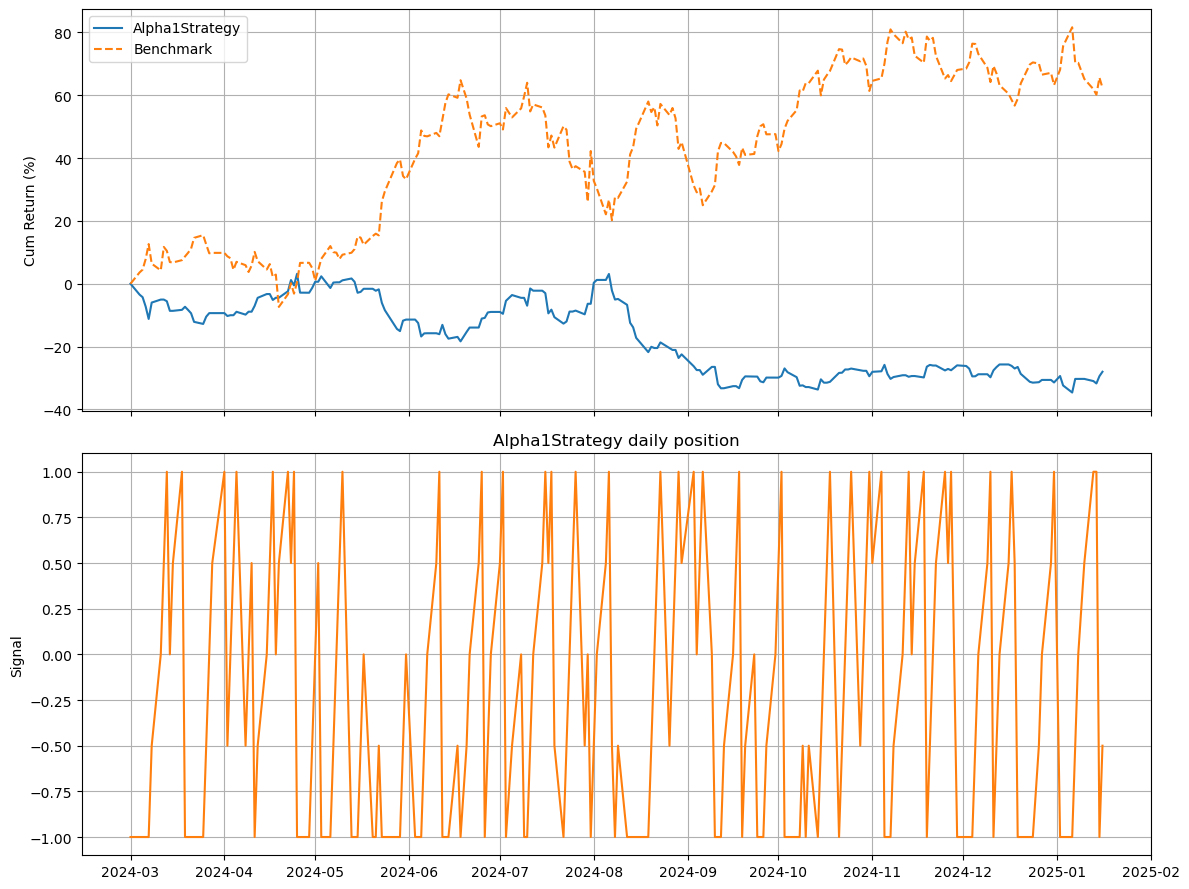

In [40]:
nvda_alpha1 = Alpha1Strategy("NVDA")
alpha1_results = nvda_alpha1.simulate(test_df)
print(alpha1_results.tail())
nvda_alpha1.plot_results(test_df)

In [41]:
strategy_classes = {
    "alpha1":  Alpha1Strategy,
    "alpha10": Alpha10Strategy,
    "alpha25": Alpha25Strategy,
    "alpha83": Alpha83Strategy,
    "alpha90": Alpha90Strategy
}

# 4. Stock Analysis

In [42]:
# ------------------------------------------------------------------
# 1.  gather daily raw signals from a list / dict of strategy classes
# ------------------------------------------------------------------
def get_strategy_signals(
        ticker: str,
        data: pd.DataFrame,
        strategy_classes: dict[str, type]
    ) -> pd.DataFrame:
    """
    Returns a DataFrame whose columns are the daily signals ∈[‑1,1] from each
    strategy in `strategy_classes` (name ➜ class).

    Example `strategy_classes`:
        { "alpha1": Alpha1Strategy,
          "alpha10": Alpha10Strategy,
          ... }

    The function instantiates each class once (no simulate call, only signals).
    """
    sig_df = pd.DataFrame(index=data.index)
    for name, StratCls in strategy_classes.items():
        sig_df[name] = StratCls(ticker).generate_signals(data)
    return sig_df


# ------------------------------------------------------------------
# 2.  rolling cumulative log‑return for each strategy
# ------------------------------------------------------------------
def rolling_perf(
        signals: pd.DataFrame,
        log_ret: pd.Series,
        window: int = 5
    ) -> pd.DataFrame:
    """
    For each strategy column in `signals`, compute the cumulative log
    performance over a rolling window of length `window`.

    Perfᵢ(t) = Σ_{τ=t-window+1…t}  Signalᵢ(τ‑1) × LogRet(τ)
    """
    perf = pd.DataFrame(index=signals.index, columns=signals.columns, dtype=float)

    # shift signals by 1 day to avoid look‑ahead bias
    strat_ret = signals.shift(1).fillna(0).mul(log_ret, axis=0)

    perf = strat_ret.rolling(window, min_periods=1).sum()
    return perf


# ------------------------------------------------------------------
# 3.  convert rolling performance to positive weights via soft‑max
# ------------------------------------------------------------------
def perf_to_weight_softmax(
        perf: pd.DataFrame,
        tau: float = 1
    ) -> pd.DataFrame:
    """
    Soft‑max transform across strategies for each date:
       scoreᵢ = exp(perfᵢ / τ)
       weightᵢ = scoreᵢ / Σ scoreⱼ

    If all perf are exactly 0 on some day, weights revert to equal share.
    """
    scores = np.exp(perf / tau)
    row_sum = scores.sum(axis=1).replace(0, np.nan)
    weights = scores.div(row_sum, axis=0)

    # if entire row was NaN (all perf==0), replace by equal share
    weights = weights.fillna(1 / len(perf.columns))
    return weights


# ------------------------------------------------------------------
# 4.  aggregate into the single‑stock signal
# ------------------------------------------------------------------
def single_stock_signal(
        signals: pd.DataFrame,
        weights: pd.DataFrame
    ) -> pd.Series:
    """
    Weighted sum S(t) = Σᵢ wᵢ(t) · Signalᵢ(t)  ∈ [‑1,1].
    """
    return (signals * weights).sum(axis=1).clip(-1, 1).rename("SingleStockSignal")

In [43]:
# ------------------------------------------------------------------
def _concat_history_future(history_df, future_df):
    """Return one continuous DataFrame (no duplicate dates)."""
    return pd.concat([history_df, future_df]).sort_index()

# ------------------------------------------------------------------
def compute_single_stock_signal(
        ticker: str,
        history_df: pd.DataFrame,
        future_df:  pd.DataFrame,
        strategy_classes: dict[str, type],
        window: int = 5,
        tau: float = 0.1,
        step_k: int = 1
    ):
    """
    Build the rolling soft‑max‑weighted signal **using full history** so
    the first rows of `future_df` have a complete look‑back window.

    Returns
    -------
    full_sig  : pd.Series   aggregated signal for *all* dates
    test_sig  : pd.Series   same series restricted to future_df.index
    """
    full_df = _concat_history_future(history_df, future_df)

    # 1) raw alpha signals for the entire span
    sig_df = get_strategy_signals(ticker, full_df, strategy_classes)

    # 2) underlying asset log‑return
    close = full_df[f"Close_{ticker}"]
    div   = full_df.get(f"Dividends_{ticker}", close.mul(0))
    log_r = np.log((close + div) / close.shift(1)).fillna(0)

    # 3) rolling perf → soft‑max weights
    perf_df   = rolling_perf(sig_df, log_r, window)
    weight_df = perf_to_weight_softmax(perf_df, tau)

    # 4) freeze weights every k days if step_k>1
    if step_k > 1:
        idx = np.arange(len(weight_df))
        mask = (idx % step_k) != step_k - 1
        weight_df.loc[mask] = np.nan
        weight_df = weight_df.ffill()

    # 5) aggregate
    full_signal = single_stock_signal(sig_df, weight_df)

    # 6) slice to testing horizon
    test_signal = full_signal.loc[future_df.index]

    return full_signal, test_signal

In [44]:
# ------------------------------------------------------------------
# Diagnostic plots for single‑stock analysis
# ------------------------------------------------------------------

def plot_single_stock_signal(
        ticker: str,
        data: pd.DataFrame,
        agg_signal: pd.Series,
        raw_signals: pd.DataFrame | None = None,
        normalize_price: bool = True,
        title: str | None = None
    ):
    """
    Visualise:
      • aggregated single‑stock signal  S(t)
      • (optional) raw alpha signals
      • underlying price series (normalised to 100 at start)

    Parameters
    ----------
    ticker          : str  (e.g. "NVDA")
    data            : full DataFrame containing Close_<ticker>
    agg_signal      : pd.Series  (output of compute_single_stock_signal)
    raw_signals     : DataFrame with individual alpha signals  (optional)
    normalize_price : bool  if True plot price rebased to 100
    title           : custom title  (optional)
    """
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # --- price series ---------------------------------------------------------
    close = data[f"Close_{ticker}"]
    if normalize_price:
        price_plot = 100 * close / close.iloc[0]
        ax1.plot(price_plot.index, price_plot, color="tab:gray", alpha=0.4, label="Price (norm.)")
        ax1.set_ylabel("Price (rebased=100)", color="gray")
    else:
        ax1.plot(close.index, close, color="tab:gray", alpha=0.4, label="Close")
        ax1.set_ylabel("Price", color="gray")
    ax1.tick_params(axis='y', labelcolor='gray')

    # --- secondary axis for signals ------------------------------------------
    ax2 = ax1.twinx()
    ax2.plot(agg_signal.index, agg_signal, label="Aggregated signal", color="tab:blue")
    if raw_signals is not None:
        # faint lines for each alpha
        for col in raw_signals.columns:
            ax2.plot(raw_signals.index, raw_signals[col],
                     alpha=0.25, lw=0.8, label=f"{col} raw")
    ax2.set_ylim(-1.05, 1.05)
    ax2.set_ylabel("Signal", color="tab:blue")
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    # --- legend / title / grid ----------------------------------------------
    lines, labels = [], []
    for ax in (ax1, ax2):
        l, lab = ax.get_legend_handles_labels()
        lines += l
        labels += lab
    ax1.legend(lines, labels, loc="upper left", ncol=2, fontsize=8)
    ax1.grid(True, alpha=0.3)
    plt.title(title or f"{ticker} — Aggregated & Raw Signals")
    plt.tight_layout()
    plt.show()


def plot_single_stock_perf(
        ticker: str,
        data: pd.DataFrame,
        agg_signal: pd.Series,
        title: str | None = None
    ):
    """
    Back‑test the aggregated signal on the fly and compare its cumulative %
    return to an always‑long benchmark.

    Assumes:
        • agg_signal ∈ [‑1,1] indexed identically to data
        • 1‑day look‑ahead bias avoided by shifting signal by +1 day
    """
    import numpy as np, matplotlib.pyplot as plt

    close = data[f"Close_{ticker}"]
    div   = data.get(f"Dividends_{ticker}", close.mul(0))

    # daily log return of the asset
    log_r = np.log((close + div) / close.shift(1)).fillna(0)

    # strategy log return
    strat_ret = agg_signal.shift(1).fillna(0) * log_r
    cum_strat = strat_ret.cumsum()
    cum_bench = log_r.cumsum()

    # convert to simple % for plotting
    strat_pct = (np.exp(cum_strat) - 1) * 100
    bench_pct = (np.exp(cum_bench) - 1) * 100

    plt.figure(figsize=(12, 6))
    plt.plot(strat_pct.index, strat_pct, label="Aggregated strategy")
    plt.plot(bench_pct.index, bench_pct, "--", label="Always long benchmark")
    plt.ylabel("Cumulative Return (%)")
    plt.title(title or f"{ticker} — Strategy vs Benchmark")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [45]:
# assume train_df is the pre‑processed DataFrame containing NVDA fields
nvda_signal_full, nvda_signal_test = compute_single_stock_signal(
                 ticker="NVDA",
                 history_df= train_df,
                 future_df=test_df,
                 strategy_classes=strategy_classes,
                 window=5,      # rolling window length L
                 tau=0.1,       # soft‑max temperature
                 step_k=2       # update every day
             )

print(nvda_signal_test.tail())

Price_Ticker
2025-01-10    0.038953
2025-01-13    0.214230
2025-01-14    0.686458
2025-01-15   -0.005869
2025-01-16   -0.069398
Name: SingleStockSignal, dtype: float64


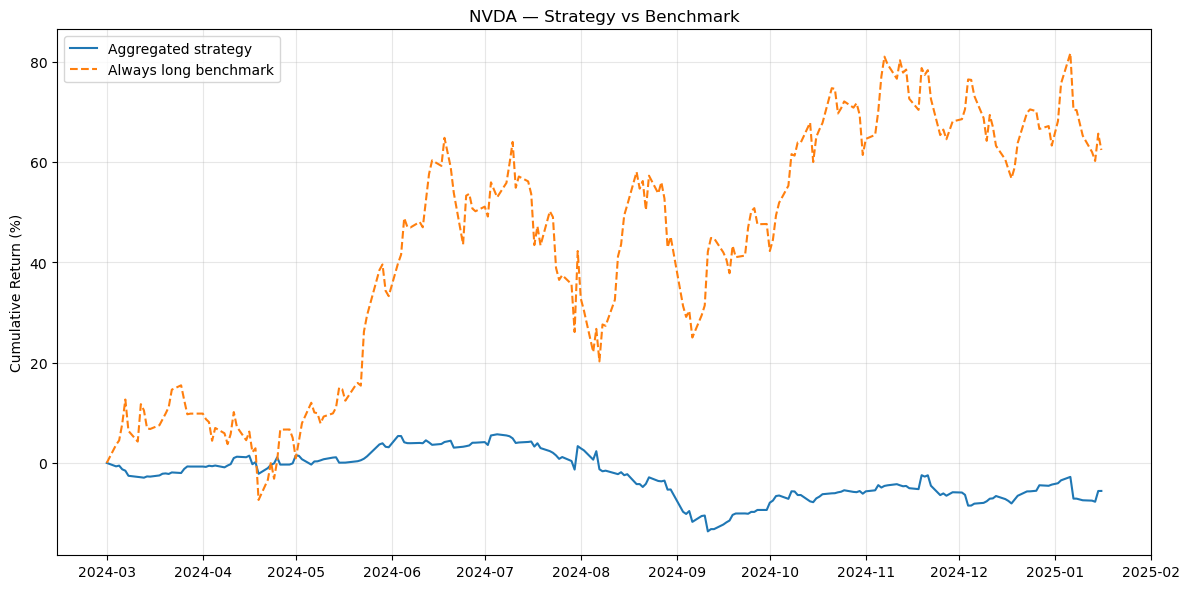

In [46]:
plot_single_stock_perf("NVDA", test_df, nvda_signal_test)

# 5. Portfolio Management